In [42]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import tensorflow as tf
from tensorflow.keras.preprocessing.image import ImageDataGenerator
import zipfile
from keras.preprocessing import image

In [31]:
tf.config.set_visible_devices([], 'GPU')
print("Num GPUs Available: ", len(tf.config.experimental.list_physical_devices('GPU')))

Num GPUs Available:  1


In [32]:
zip_file = 'datasets/zip_CNN_dog_cat_dataset.zip'

with zipfile.ZipFile(zip_file, 'r') as zip_ref:
    zip_ref.extractall('/home/elloukelie/notebooks/datasets/')

In [33]:
train_datagen = ImageDataGenerator(
    rescale=1./255,
    shear_range=0.2,
    zoom_range=0.2,
    horizontal_flip=True
)

In [34]:
test_datagen = ImageDataGenerator(rescale=1./255)

In [35]:
train_set = train_datagen.flow_from_directory(
    'datasets/CNN_dog_cat_dataset/dataset/training_set/',
    target_size=(64, 64),
    batch_size=32,
    class_mode='binary'
)

test_set = test_datagen.flow_from_directory(
    'datasets/CNN_dog_cat_dataset/dataset/test_set/',
    target_size=(64, 64),
    batch_size=32,
    class_mode='binary'
)


Found 8000 images belonging to 2 classes.
Found 2000 images belonging to 2 classes.


In [36]:
print(test_set.class_indices)

{'cats': 0, 'dogs': 1}


In [38]:
cnn = tf.keras.models.Sequential()

cnn.add(tf.keras.Input(shape=(64, 64, 3)))  # Use Input layer first

## First convolutional layer
cnn.add(tf.keras.layers.Conv2D(filters=32, kernel_size=3, activation='relu'))
cnn.add(tf.keras.layers.MaxPool2D(pool_size=2, strides=2, padding='valid'))

## Second convolutional layer
cnn.add(tf.keras.layers.Conv2D(filters=32, kernel_size=3, activation='relu'))
cnn.add(tf.keras.layers.MaxPool2D(pool_size=2, strides=2, padding='valid'))

In [39]:
cnn.add(tf.keras.layers.Flatten())

In [40]:
cnn.add(tf.keras.layers.Dense(units=128, activation='relu'))

cnn.add(tf.keras.layers.Dense(units=1, activation='sigmoid'))

In [41]:
cnn.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])

try:
    cnn.fit(train_set, validation_data=test_set, epochs=25)
except Exception as e:
    print(e)

Epoch 1/25


  1/250 ━━━━━━━━━━━━━━━━━━━━ 4:46 1s/step - accuracy: 0.5312 - loss: 0.7059

I0000 00:00:1744219197.750708  740960 device_compiler.h:188] Compiled cluster using XLA!  This line is logged at most once for the lifetime of the process.


250/250 ━━━━━━━━━━━━━━━━━━━━ 22s 83ms/step - accuracy: 0.5275 - loss: 0.7009 - val_accuracy: 0.6015 - val_loss: 0.6641
Epoch 2/25
250/250 ━━━━━━━━━━━━━━━━━━━━ 17s 69ms/step - accuracy: 0.6130 - loss: 0.6583 - val_accuracy: 0.6805 - val_loss: 0.6049
Epoch 3/25
250/250 ━━━━━━━━━━━━━━━━━━━━ 18s 70ms/step - accuracy: 0.6711 - loss: 0.6024 - val_accuracy: 0.7020 - val_loss: 0.5878
Epoch 4/25
250/250 ━━━━━━━━━━━━━━━━━━━━ 20s 80ms/step - accuracy: 0.7200 - loss: 0.5459 - val_accuracy: 0.7000 - val_loss: 0.5597
Epoch 5/25
250/250 ━━━━━━━━━━━━━━━━━━━━ 17s 69ms/step - accuracy: 0.7424 - loss: 0.5288 - val_accuracy: 0.7505 - val_loss: 0.5110
Epoch 6/25
250/250 ━━━━━━━━━━━━━━━━━━━━ 20s 82ms/step - accuracy: 0.7647 - loss: 0.4899 - val_accuracy: 0.7555 - val_loss: 0.5094
Epoch 7/25
250/250 ━━━━━━━━━━━━━━━━━━━━ 17s 69ms/step - accuracy: 0.7810 - loss: 0.4650 - val_accuracy: 0.7695 - val_loss: 0.4941
Epoch 8/25
250/250 ━━━━━━━━━━━━━━━━━━━━ 17s 70ms/step - accuracy: 0.7779 - loss: 0.4489 - val_accurac

In [44]:
test_image = image.load_img(
    'datasets/CNN_dog_cat_dataset/dataset/single_prediction/cat_or_dog_1.jpg',
    target_size=(64, 64)
)
test_image = image.img_to_array(test_image)
test_image = test_image / 255.0
test_image = np.expand_dims(test_image, axis=0)

result = cnn.predict(test_image)
print(result)

if result[0][0] > 0.5:
    prediction = 'dog'
else:
    prediction = 'cat'

print(prediction)

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 128ms/step
[[0.9998933]]
dog


In [45]:
test_image = image.load_img(
    'datasets/CNN_dog_cat_dataset/dataset/single_prediction/cat_or_dog_2.jpg',
    target_size=(64, 64)
)
test_image = image.img_to_array(test_image)
test_image = test_image / 255.0
test_image = np.expand_dims(test_image, axis=0)

result = cnn.predict(test_image)
print(result)

if result[0][0] > 0.5:
    prediction = 'dog'
else:
    prediction = 'cat'

print(prediction)

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 28ms/step
[[0.02975933]]
cat


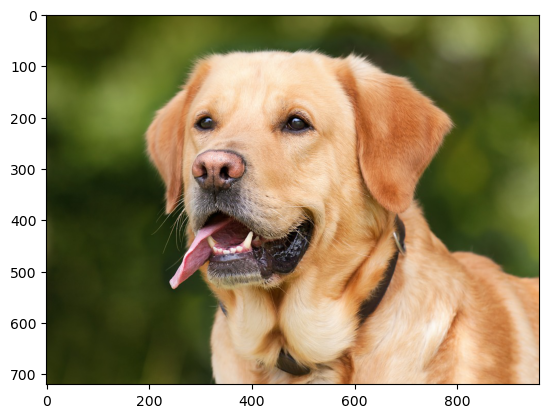

In [50]:
isdog = image.load_img('datasets/CNN_dog_cat_dataset/dataset/single_prediction/cat_or_dog_1.jpg')
plt.imshow(iscat)

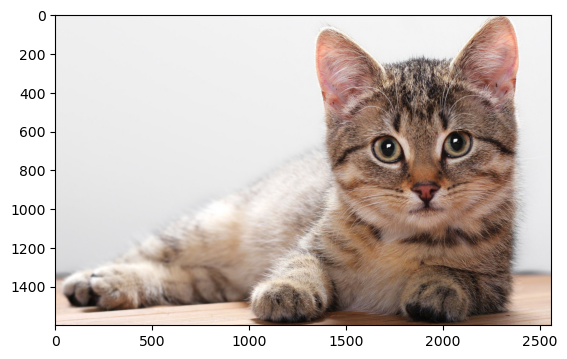

In [51]:
iscat = image.load_img('datasets/CNN_dog_cat_dataset/dataset/single_prediction/cat_or_dog_2.jpg')
plt.imshow(iscat)

End of slide 63 - Convolutional Neural Network - Image Representation